# Домашнє завдання: Візуалізація даних з Pandas

## Опис завдання
У цьому домашньому завданні ви працюватимете з датасетом про оренду велосипедів `yulu_rental.csv`. Датасет містить інформацію про кількість орендованих велосипедів залежно від погодних умов, сезону та інших факторів.
Набір даних взяти з Kaggle. Посилання на оригінальний [опис](https://www.kaggle.com/datasets/ranitsarkar01/yulu-bike-sharing-data?select=yulu_bike_sharing_dataset.csv).

**Опис колонок:**
- `datetime` - дата та час
- `season` - сезон (1=весна, 2=літо, 3=осінь, 4=зима)
- `holiday` - чи є день святковим (0=ні, 1=так)
- `workingday` - чи є день робочим (0=ні, 1=так)
- `weather` - погодні умови (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ)
- `temp` - температура в градусах Цельсія
- `atemp` - відчувається як температура
- `humidity` - вологість (%)
- `windspeed` - швидкість вітру
- `casual` - кількість випадкових користувачів
- `registered` - кількість зареєстрованих користувачів
- `count` - загальна кількість орендованих велосипедів

## Підготовка даних


In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Завантаження даних
df = pd.read_csv('yulu_rental.csv')

In [81]:
# Перетворення datetime у правильний формат
df['datetime'] = pd.to_datetime(df['datetime'])
df.set_index('datetime', inplace=True)

# Додамо додаткові колонки для аналізу
df['date'] = df.index.date
df['day'] = df.index.day
df['week'] = df.index.isocalendar().week
df['weekday_num'] = df.index.weekday
df['weekday'] = df.index.day_name()
df['year'] = df.index.year
df['month'] = df.index.month
df['hour'] = df.index.hour

## Завдання 0: Перегляд даних
**Завдання:**
Перегляньте дані, їх розмір, та напишіть висновок:
- скільки даних в наборі
- який рівень деталізації мають ці дані, тобто за який період міститься дані в одному рядку даних ?

In [82]:
# Переглядаємо скільки даних у наборі
print(df.shape)

(10886, 19)


In [83]:
# Перевіряємо рівень деталізації даних
print(df.index.to_series().diff().value_counts().head())

datetime
0 days 01:00:00     10820
0 days 02:00:00        36
12 days 01:00:00       13
11 days 01:00:00        8
0 days 03:00:00         5
Name: count, dtype: int64


Даних 10886 рядків, 14 колонок.
В кожному рядку сума оренд велосипедів за 1 годину.

Висновок: у наборі міститься 10886 рядків і 19 колонок.
Інтервал між записами - 1 година (зустрічається 10820 разів), що значить, що дані мають погодинну деталізацію. У наборі також є невелика к-ть записів з інтерваломбільшим  (2,3 год, 11-12 днів). Це може свідчити про нерівномірний збір даних, пропущені значення.

## Завдання 1: Базовий лінійний графік

**Завдання:**
1. Згрупуйте дані про кількість орендованих велосипедів (`count`) поденно.
2. Побудуйте з методом `DataFrame.plot()` лінійний графік поденної кількості орендованих велосипедів (`count`) за весь період в даних.
3. Налаштуйте розмір графіка (12x6), додайте заголовок "Динаміка оренди велосипедів" та сітку.
4. Дайте відповіді на питання по цьому графіку. Якщо треба - проведіть додаткові програмні операції для відповідей.

**Питання для інтерпретації:**
1. Як гадаєте, чому графік має "заломи", чим це спричинено і як ви б могли прибрати заломи?
2. Які загальні тенденції ви бачите на графіку?
3. Чи помітні якісь сезонні коливання?
4. Чи є періоди з аномально високими або низькими значеннями і чому на ваш погляд можуть бути ці аномалії?


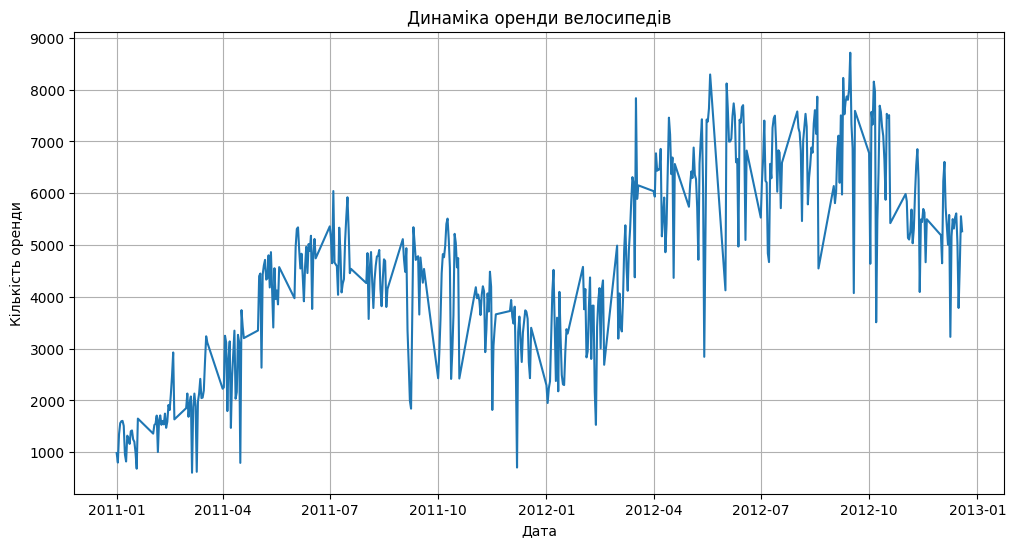

In [102]:
# Групуємо дані поденно за сумою оренд
daily_rentals = df.groupby('date')['count'].sum()

daily_rentals.plot(
    figsize=(12, 6), 
    grid=True, 
    title='Динаміка оренди велосипедів',
    xlabel='Дата',
    ylabel='Кількість оренди'
)
plt.show()

**Відповіді на питання для інтерпритації:**
1. Графік має "заломи", бо є дні, коли оренди майже не було, можемо припустити що це могло бути через погану погоду, або ж дні, коли оренда не працювала із технічних причин. Щоб уникнути "заломів" до нуля, можна вилучити дні із відсутніми або дуже малими значеннями оренди.
3. Аналізуючи графік, бачимо, що к-ть оренди велосипедів зростає з 2011 року і до початку 2012 року. У зимові місяці спад, який можна пояснити тим, що взимку на велосипеді не дозволяє кататись погода.
4. На графіку прослідковується зростання к-ті оренди у весняні і літні місяці та спадання у зимові.
5. На гарфіку бачимо аномальні падіння до 0 - через пропуски даних. Високі значення говорять про те, що к-ть оренди збільшується у теплі пори року, вихідні, коли є підвищений попит на оренду із метою активно провести відпочинок. Доцільно проаналізувати у які саме дні було найменше і найбільше оренд, що робимо нижчче:

In [100]:
# Дні з найменшою кількістю оренд
print(daily_rentals.nsmallest(5))

# Дні з найбільшою кількістю оренд
print(daily_rentals.nlargest(5))

date
2011-03-06    605
2011-03-10    623
2011-01-18    683
2011-12-07    705
2011-04-16    795
Name: count, dtype: int64
date
2012-09-15    8714
2012-05-19    8294
2012-09-09    8227
2012-10-05    8156
2012-06-02    8120
Name: count, dtype: int64



## Завдання 2: Аналіз сезонності (Bar Plot)

**Завдання:**
Побудуйте вертикальну стовпчасту діаграму середньої кількості орендованих велосипедів за сезонами. Додайте підписи осей і заголовок.

Просунуте доповнення:
1. Позначте сезони не числом, а назвою на візуалізації.
2. Додайте підписи над стовпцями зі значеннями в кожному стовпці.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В який сезон найбільша середня кількість оренди велосипедів?
2. Як ви можете пояснити таку сезонну закономірність?
3. У скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном?

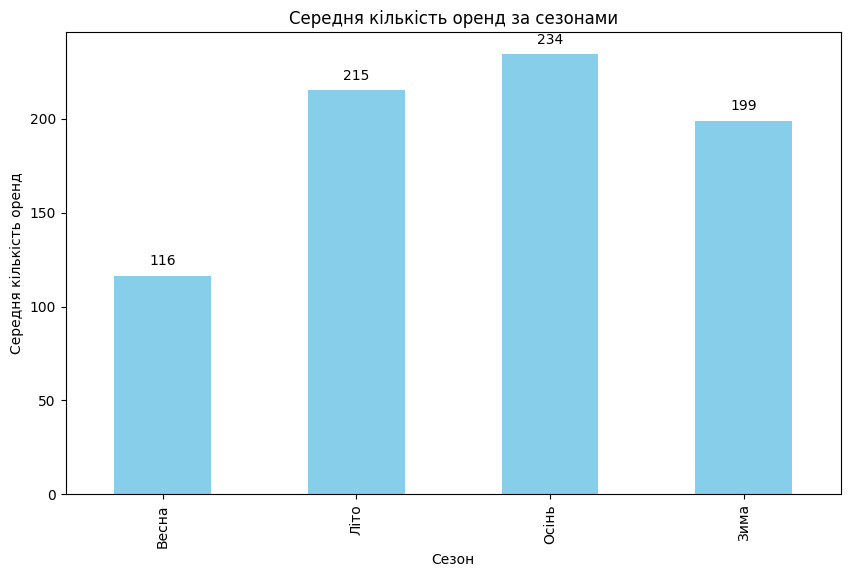

In [125]:
# Словник для заміни чисел назвами сезонів
season_labels = {
    1: 'Весна',
    2: 'Літо',
    3: 'Осінь',
    4: 'Зима'
}

# Групуємо дані за сезоном і рахуємо середню кількість оренд
season_avg = df.groupby('season')['count'].mean()

# Замінюємо числові значення сезонів на текстові
season_avg.index = season_avg.index.map(season_labels)

# Побудова стовпчастої діаграми
ax = season_avg.plot(
    kind='bar',
    figsize=(10, 6),
    color='skyblue',
    title='Середня кількість оренд за сезонами'
)

# Підписи осей
ax.set_xlabel('Сезон')
ax.set_ylabel('Середня кількість оренд')

# Додавання підписів над стовпцями
for i, value in enumerate(season_avg):
    ax.text(i, value + 4, f'{value:.0f}', ha='center', va='bottom', fontsize=10)


**Відповіді на питання для інтерпретації:**
1. Найбільша середня кількість оренди велосипедів восени.
2. Така сезонна зокономірність пояснюється тим, що погода не спекотна занодто, як влітку, але ще досить комфортна. Люди прагнуть довше проводити час на свіжому повітрі, погода сприятлива для прогулянок і відпочинку, світловий день ще довгий, відпусток і вихідних більше, а відповідно і часу та бажання людей для велоспорту.
3. Щоб відповісти на питання у скільки разів відрізняється оренда між найпопулярнішим та найменш популярним сезоном потрібно обрахувати це за допомогою формули нижче:

In [23]:
ratio = season_avg.max() / season_avg.min()
print(f"Оренда в найпопулярніший сезон у {ratio:.2f} рази більша, ніж у найменш популярний.")

Оренда в найпопулярніший сезон у 1.89 рази більша, ніж у найменш популярний.


## Завдання 3: Динаміка за місяцями (Line Plot)

**Завдання:**
Створіть лінійний графік середньої кількості оренди велосипедів по місяцях (тобто групування в рамках місяця і беремо середню кількість оренд в цей місяць з кількох років). Використайте маркери-кружечки для точок, додайте сітку та пофарбуйте лінію у червоний колір.

Просунуте доповнення:
- додайте аби по осі ОХ поділки були чітко на кожен окремий місяць по одній. Тобто сумарно 12 поділок.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які місяці спостерігається пік та спад оренди?
2. Чи збігається ця закономірність з результатами з попереднього завдання?
3. Як може вплинути клімат на оренду велосипедів протягом року?


In [103]:
# Групуємо по місяцях і обчислюємо середню кількість оренд у кожному місяці (незалежно від року)
monthly_avg = df.groupby('month')['count'].mean()

In [104]:
monthly_avg

month
1      90.366516
2     110.003330
3     148.169811
4     184.160616
5     219.459430
6     242.031798
7     235.325658
8     234.118421
9     233.805281
10    227.699232
11    193.677278
12    175.614035
Name: count, dtype: float64

[Text(1, 0, 'Січ'),
 Text(2, 0, 'Лют'),
 Text(3, 0, 'Бер'),
 Text(4, 0, 'Кві'),
 Text(5, 0, 'Тра'),
 Text(6, 0, 'Чер'),
 Text(7, 0, 'Лип'),
 Text(8, 0, 'Сер'),
 Text(9, 0, 'Вер'),
 Text(10, 0, 'Жов'),
 Text(11, 0, 'Лис'),
 Text(12, 0, 'Гру')]

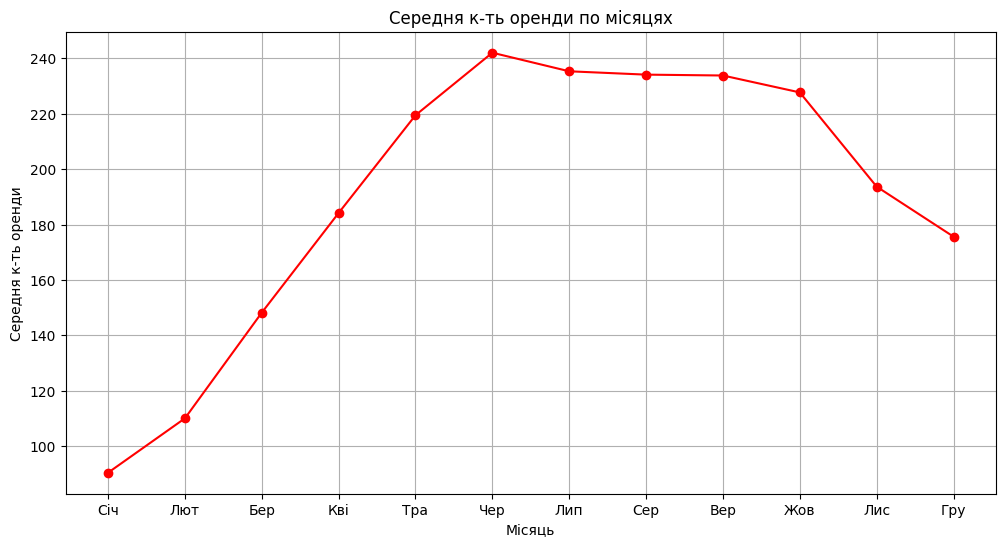

In [117]:
ax = monthly_avg.plot(
    kind='line',
    marker='o',
    figsize=(12, 6),
    color='red',
    title='Середня к-ть оренди по місяцях',
    xlabel='Місяць',
    ylabel='Середня к-ть оренди',
    grid=True
)

# Встановлюємо 12 поділок — по одному на кожен місяць
ax.set_xticks(range(1, 13)) 

# Встановлюємо підписи — назви місяців українською
ax.set_xticklabels([
    'Січ', 'Лют', 'Бер', 'Кві', 'Тра', 'Чер',
    'Лип', 'Сер', 'Вер', 'Жов', 'Лис', 'Гру'
])

**Відповіді на питання для інтерпретації:**
1. Пік оренди спостерігається в червні. Спад - у січні.
2. Ця закономірність збігається із результатами попереднього дослідження.
3. Клімат безумовно впливає на оренду велосипедів протягом року. Так як опади, негода, холод негативно впливає на бажання і можливість кататись на велосипедах.

## Завдання 4: Розподіл погодних умов (Pie Chart)

**Завдання:**
1. Побудуйте кругову діаграму частки днів з різними погодними умовами.
2. Додайте підписи з відсотками та легенду з описами погоди (1=ясно, 2=туман, 3=легкий дощ, 4=сильний дощ).
3. Визначте свої відмінні від стандартних кольори для відображення кожної категорії.
4. Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. Яка погода переважає в датасеті?
2. Чи є дні із сильним дощем? Яка їх частка?
3. Як ви думаєте, як погодні умови впливають на попит на оренду велосипедів?

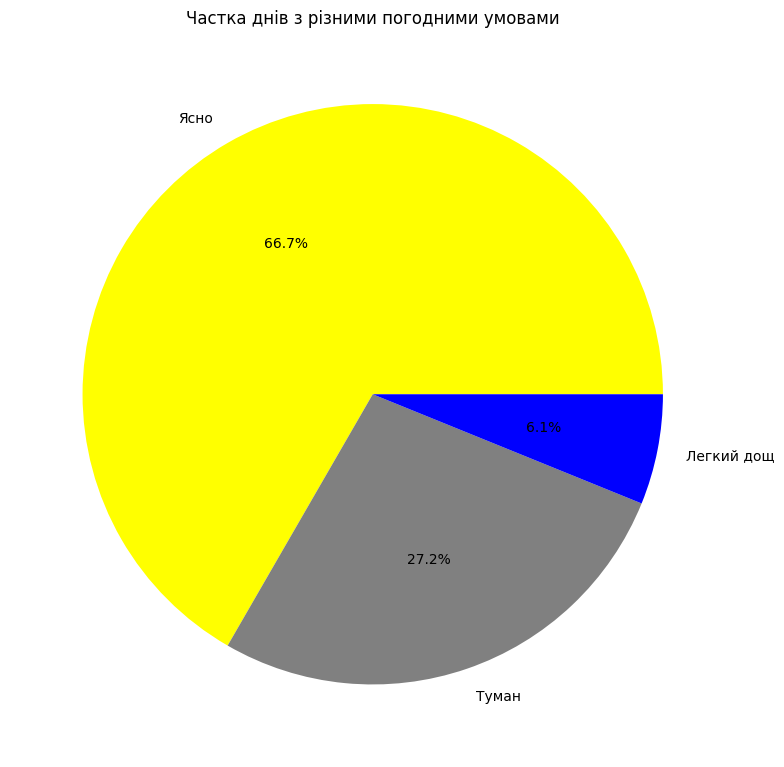

In [130]:
# Обчислюємо кількість унікальних днів з кожним типом погоди
weather_by_day = df.resample('D').first()['weather'].value_counts().sort_index()

# Опис погоди
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

# Кольори для кожної категорії погоди
weather_colors = {
    1: 'yellow',   # Ясно – жовтий
    2: 'grey',   # Туман – сірий
    3: 'blue',   # Легкий дощ – блакитний
    4: 'violet'    # Сильний дощ – фіолетовий
}

# Підготовка даних для графіка
labels = [weather_labels[i] for i in weather_by_day.index]
colors = [weather_colors[i] for i in weather_by_day.index]

# Побудова кругової діаграми
weather_by_day.plot.pie(
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    figsize=(8, 8),
    title='Частка днів з різними погодними умовами',
    legend=False
)

plt.ylabel('')  # Прибираємо зайву вісь Y
plt.tight_layout()

**Відповіді на питання для інтерпретації:**
1. У датасеті переважає ясна погода.
2. Днів із сильним дощем немає - у сильний дощ люди не орендують велосипеди.
3. Погодні умови напряму впливають на попит велосипедів. У ясну, помірно теплу погоду к-ть оренди найбільша, тоді як у дощ, туман, сильний дощ менша  або ж відсутня взагалі.

## Завдання 5: Box Plot для аналізу викидів

**Завдання:**
Створіть коробковий графік (box plot) кількості орендованих велосипедів для кожного типу погоди.

Просунуте доповнення:
- Використайте горизонтальну орієнтацію.
- Позначте погодні умови не числом, а назвою на візуалізації.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. При якій погоді найбільший розкид у кількості оренди?
2. Чи є викиди (outliers) в даних? При якій погоді?
3. При якій погоді медіанне значення оренди найвище?

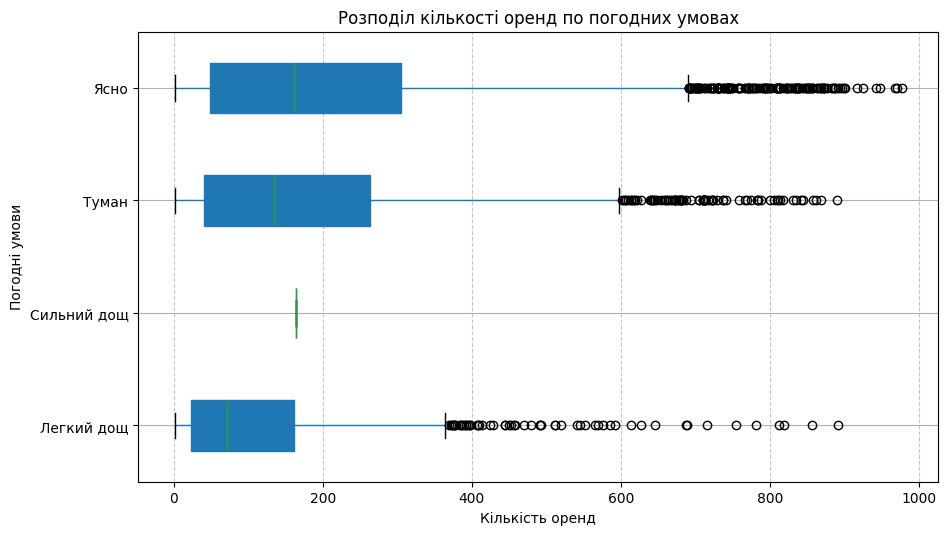

In [134]:
# Створюємо словник назв погодних умов
weather_labels = {
    1: 'Ясно',
    2: 'Туман',
    3: 'Легкий дощ',
    4: 'Сильний дощ'
}

# Замінюємо числові значення на текстові в копії колонки
df['weather_label'] = df['weather'].map(weather_labels)

# Створення горизонтального box plot
ax = df.boxplot(
    column='count',
    by='weather_label',
    vert=False,  # горизонтальна орієнтація
    figsize=(10, 6),
    patch_artist=True  # для кольору
)

# Оформлення графіка
plt.title('Розподіл кількості оренд по погодних умовах')
plt.suptitle('')  # прибираємо стандартний заголовок Pandas
plt.xlabel('Кількість оренд')
plt.ylabel('Погодні умови')
plt.grid(True, axis='x', linestyle='--', alpha=0.7)


**Відповіді на питання для інтерпретації:**
1. Погада "Ясно" має найбільший розкид у к-ті оренди.
2. Найбільше викидів спостерігається при "Ясно".
Також є викиди при "Туман" і "Легкий дощ".
При "Сильний дощ" - розподіл майже відсутній, але один-два екземпляри викидів можуть бути присутні.
3. "Ясно" має найвище медіанне значення це видно з того, що горизонтальна лінія (медіана) у цій коробці знаходиться правіше, ніж у всіх інших.

Аналізуючи узагальнено результати розподілу оренд велосипедів за погодними умовами бачимо, що хороша погода сприяє як високій, так і дуже різноманітній активності користувачів (багато оренд і викидів). Тоді як у погану погоду (дощ/шторм) попит  падає, розподіл вузький або майже відсутній.

## Завдання 6: Кореляція температури та оренди (Scatter Plot)

**Завдання:**
Побудуйте діаграму розсіювання залежності між температурою (`temp`) та загальною кількістю оренди (`count`). Розфарбуйте точки за сезонами, додайте напівпрозорість (alpha=0.6).

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
- Чи є зв'язок між температурою та кількістю оренди? Який?

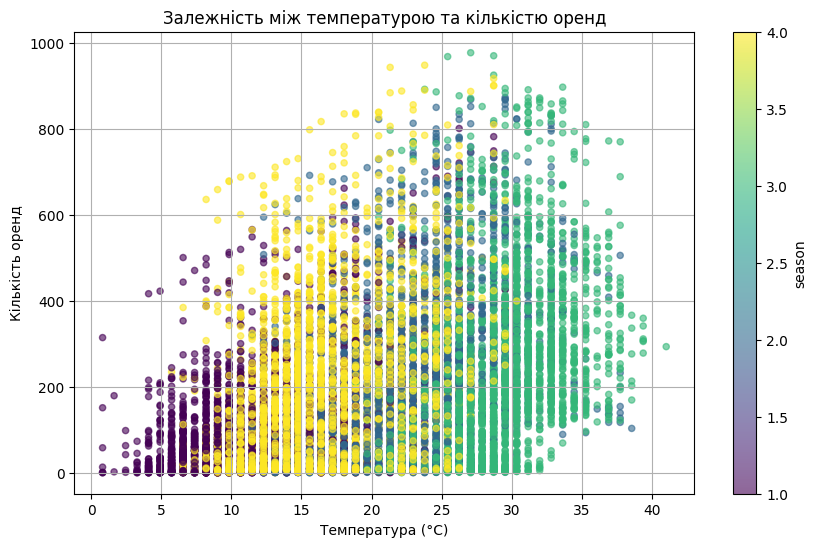

In [57]:
df.plot.scatter(
    x='temp',
    y='count',
    c='season',         
    colormap='viridis',    
    alpha=0.6,
    figsize=(10, 6),
    title='Залежність між температурою та кількістю оренд'
)

plt.xlabel('Температура (°C)')
plt.ylabel('Кількість оренд')
plt.grid(True)
plt.show()

**Відповіді на питання для інтерпретації:**
1. На побудованому графіку бачимо залежність між Температурою, яка зображена на осі Х і к-тю оренди, яка зображена на осі Y. Колір точок відповідає за сезон року (весна - фіолетовий, літо - зелений, осінь - жовтий, зима - бірюзовий). На графіку чітко прослідковується залежність між температурою і к-тю оренди, це і є логічно, чим вища температура - тим більше людей орендують велосипеди. БАчимо, що коли температура дуже низька і дуже висока - к-ть оренд спадає, бо кататись некомфортно/неможливо.

## Завдання 7: Порівняння користувачів (Stacked Bar Chart)

**Завдання:**
Ми хочемо дізнатись як по дням тижня беруть в середньому в оренду велосипеди випадкові і зареєстровані користувачі.

Створіть стовпчасту діаграму з накопиченням (bar з налаштуванням `stacked=True`), яка показує співвідношення випадкових (`casual`) та зареєстрованих (`registered`) користувачів по днях тижня за кількістю взятих ними велосипедів в оренду в середньому. Використайте різні кольори для типів користувачів.

Дайте відповіді на питання нижче.

**Питання для інтерпретації:**
1. В які дні тижня більше оренд від зареєстрованих користувачів?
2. Як ви можете пояснити таку різницю в поведінці користувачів протягом тижня?

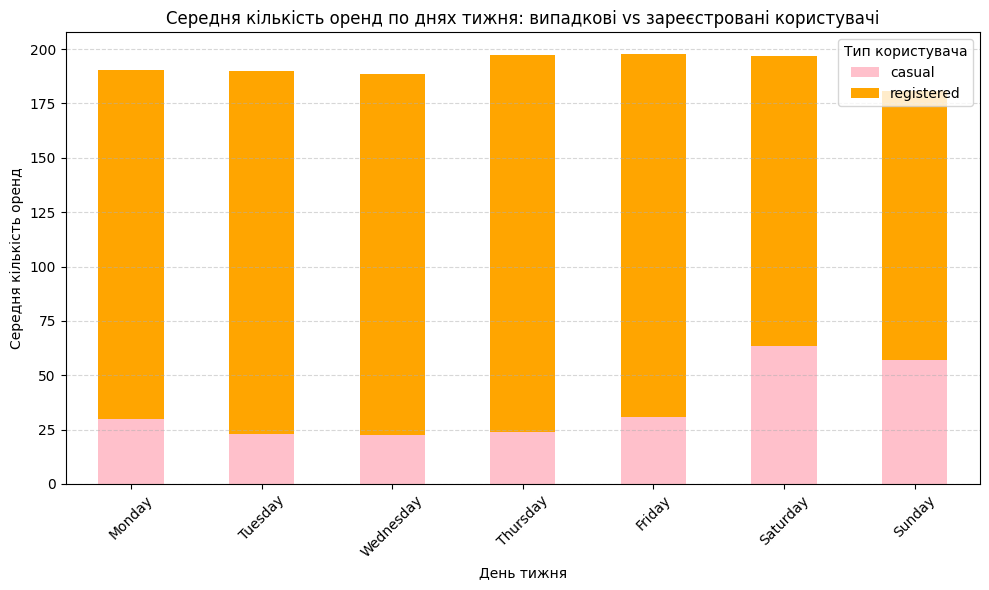

In [85]:
# Групуємо по днях тижня і обчислюємо середнє для випадкових - casual і зареєстрованих - registered користувачів
avg_users_by_weekday = df.groupby('weekday')[['casual', 'registered']].mean()

# Щоб дні тижня йшли у правильному порядку (з понеділка по неділю)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
avg_users_by_weekday = avg_users_by_weekday.reindex(weekday_order)

# Побудова stacked bar chart
avg_users_by_weekday.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['pink', 'orange'],  # Колір для casual (рожевий) і registered (помаранчевий)
    title='Середня кількість оренд по днях тижня: випадкові vs зареєстровані користувачі'
)

plt.xlabel('День тижня')
plt.ylabel('Середня кількість оренд')
plt.xticks(rotation=45)
plt.legend(title='Тип користувача')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()